# Tutorial on Grover's Algorithm (2)
## Circuit with <i>n</i> qubits with built-in MultiControlled-X gates.
***

### The 2023 World Congress in Computer Science, Computer Engineering, & Applied Computing (CSCE'23)
### The 2nd International Conference on Emergent Quantum Technologies (ICEQT'23)

### July 24-27 2023 Las Vegas, NV
By Leon Deligiannidis, Ph.D.,
School of Computing and Data Science,
Wentworth Institute of Technology,
Boston, MA.
***

In [ ]:
!pip install qiskit[visualization]

In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCXGate

print("Imports Successful")

Imports Successful


In [2]:
n_qbits = 5                    # try any number from 4 to 20
                               # The larger the number the longer it takes to run.
                               # It is recommended Not to draw your circuit when you pick numbers larger than 16

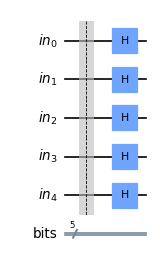

In [3]:
scale=0.6                                  # scale factor for drawing the circuits

q = QuantumRegister(n_qbits, name='in')    # The input Register
c = ClassicalRegister(n_qbits, "bits")     # The classical register where final result is written to.
circuit= QuantumCircuit(q, c)

circuit.barrier()
circuit.h(q)

circuit.draw('mpl', scale=scale)

In [4]:
def createOracle(s):
    
    o = QuantumCircuit(n_qbits, name='O\nR\nA\nC\nL\nE')
    
    
    
    gate = MCXGate(n_qbits-1, label="CCCNOT")  # Multi-controlled X gate

    
   
    for i in range(n_qbits):
        if s[i] == 0:
            o.x(i) 
    
    #
    # Sandwich X aound H gates to get Z. Z=HXH (and also X=HZH)
    # Replace X with a MC-X gate to build a MC-Z gate
    #
    o.barrier()
    o.h(n_qbits-1)  # the last one, starting from 0.        
    #o.append(gate, [0, 1, 2,   3])
    o.append(gate, list(range(n_qbits)))
    o.h(n_qbits-1)  
    o.barrier()

    # now uncompute
    for i in range(n_qbits):
        if s[i] == 0:
            o.x(i)   
    
       
    o.barrier()
    return o

Searching for string: [0 0 0 1 1].


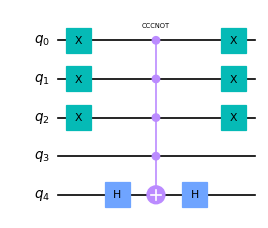

In [5]:
myString = np.random.randint(2, size=n_qbits) 
print(f"Searching for string: {myString}.")

oracle = createOracle(myString)
oracle.draw('mpl', scale=scale, plot_barriers=False)

In [6]:
def createInversionAboutTheMean():
    q = QuantumRegister(n_qbits, name='in')
    
    o = QuantumCircuit(q, name='iam')
    o.barrier()
    o.h(q)
    o.barrier()
    o.x(q)
    o.barrier()
    
    # Building a MC-Z gate
    o.barrier()
    o.h(n_qbits-1)
    gate = MCXGate(n_qbits-1, label="CCCNOT")
    #o.append(gate, [0, 1, 2,   3])
    o.append(gate, list(range(n_qbits)))
    o.h(n_qbits-1)

    o.barrier()
    o.x(q)
    o.barrier()
    o.h(q)
    o.barrier()
    return o


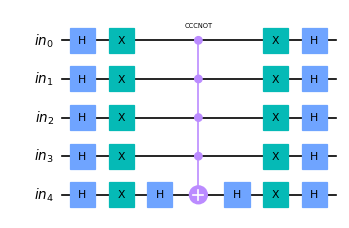

In [7]:
iam = createInversionAboutTheMean()
iam.decompose('iam').draw('mpl', scale=scale, plot_barriers=False)

In [8]:
my_iters=int( (np.pi/4.0) * np.sqrt((2**n_qbits)) )
print(f"Number of iterations {my_iters}. Total elements in database: {2**n_qbits}")

for i in range(my_iters):
    circuit.append(oracle, list(range(n_qbits)))
    circuit.append(iam, list(range(n_qbits)))
    

circuit.measure(range(n_qbits), range(n_qbits))


Number of iterations 4. Total elements in database: 32


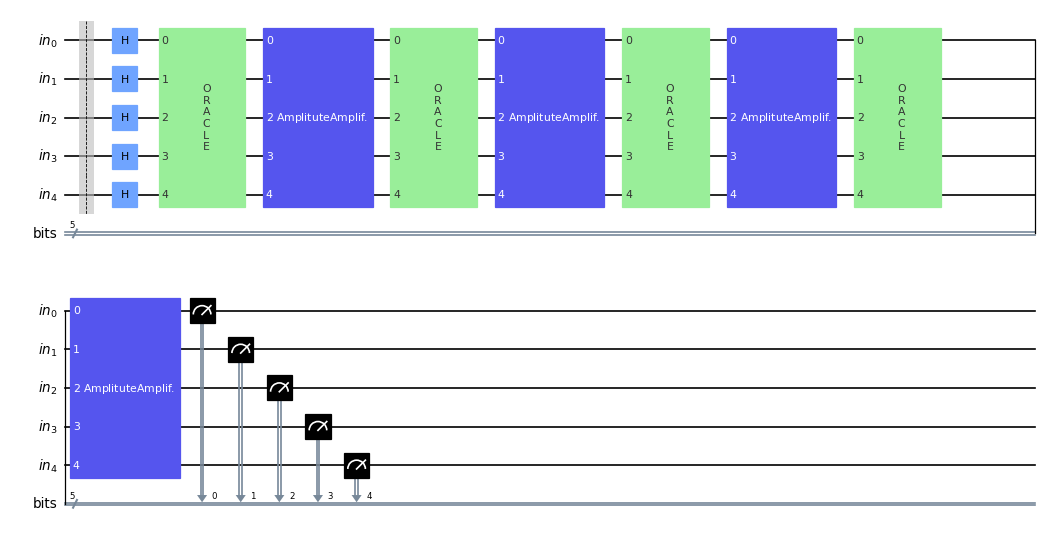

In [9]:
style={'displaycolor': {  'iam':              ('#5555ee', '#ffffff'),
                          'O\nR\nA\nC\nL\nE': ('#99ee99', '#333333')    },
       'displaytext':  {'iam': "Amplitute Amplif."}}

circuit.draw('mpl', scale=scale, plot_barriers=True, style=style)

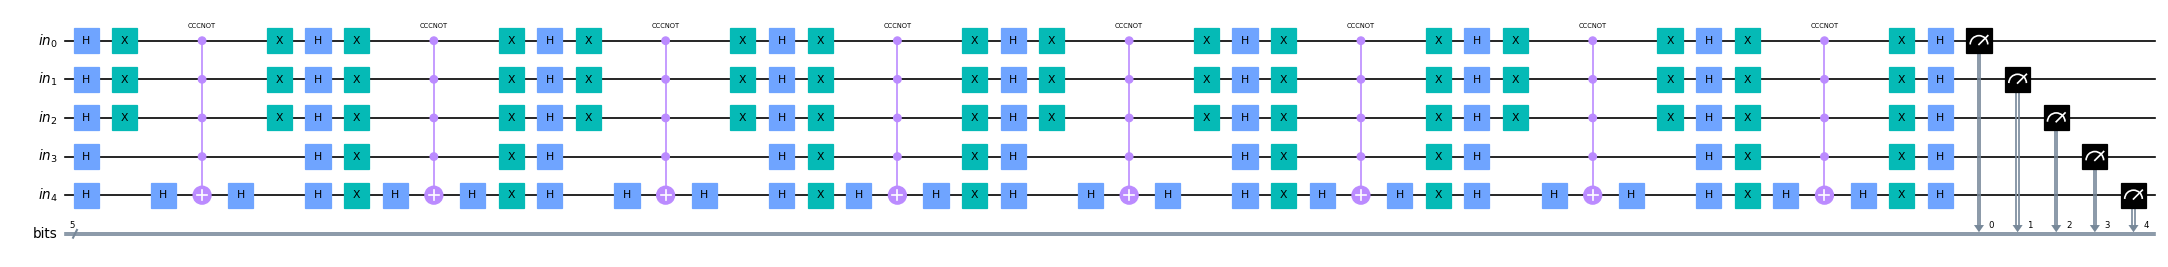

In [10]:
circuit.decompose('O\nR\nA\nC\nL\nE').decompose('iam').draw('mpl', scale=scale, plot_barriers=False, fold=60)


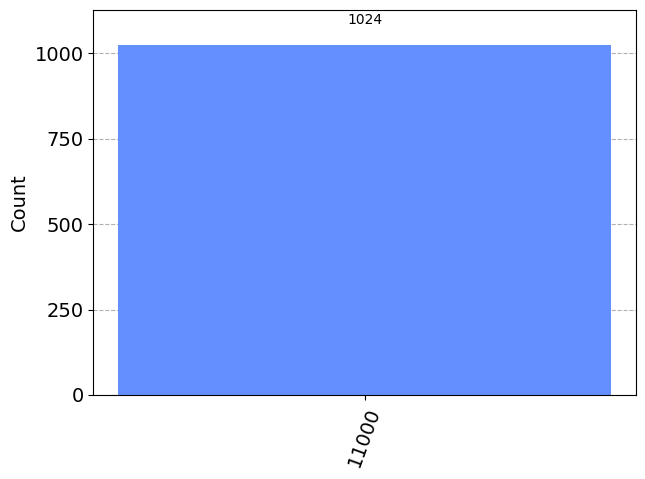

The answer is: {'11000': 1024}


In [11]:
from qiskit import execute
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1024)

result = job.result()
counts = result.get_counts(circuit)
display(plot_histogram(counts))
print(f"The answer is: {counts}")


In [12]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright